# Data Understanding

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from io import StringIO

# Allow pandas to display all columns from a dataframe
pd.options.display.max_columns = None

## 1- Collect initial data
Adquirir los datos necesarios. Esta recopilación de datos inicial se refiere a la carga de datos, ya sea descargarlo directamente de una página web o la extracción desde una base de datos. Algo que tomar en cuenta es que si los datos vienen de diferentes fuentes en este paso se puede incluir la integración de los mismos. Al finalizar esta tarea es necesario realizar un reporte sobre lo ocurrido en esta etapa, ya sea las fuentes de donde se obtuvieron los datos, problemas que hubo durante la recolección o integración (si es que se hizo).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
# Readind data
df = pd.read_csv(
    '/content/drive/MyDrive/Maestria/modelo/input/raw_dataset.csv',
    sep=',', 
    parse_dates=['credito_fecha_inicio', 'credito_fecha_fin', 'fecha_pago', 'cliente_fecha_nacimiento']
  )
df.head()

,folio_factura,folio_credito,factura_importe,factura_moneda,credito_fecha_inicio,credito_fecha_fin,fecha_pago,dias_financiar,aplica_interes_en_dispersion,porcentaje_adelanto,linea_tipo,contrato_marco,linea_limite,linea_moneda_principal,linea_monedas_permitidas,cliente_rfc,cliente_razon_social,cliente_regimen_fiscal,cliente_pais,cliente_fecha_nacimiento,cliente_ocupacion,cliente_sector,codigo_scian,codigo_scian_nombre,riesgo_pld,pagador_rfc,pagador_nombre,pagador_pais,pagador_scian,pagador_scian_nombre
0,5212,ACF2021021-4*1,"$6,905,230.58",MXN,2022-07-01,2022-11-18,2022-07-18,140,False,90.00%,Blú Index,ACF2021021,"$20,000,000.00",MXN,"[""MXN"", ""USD""]",IMO621228BP3,INDUSTRIAS MONTILLA SA DE CV,PM,MEX,1962-12-28,FABRICACION DE ESTRUCTURAS DE METAL,Privado,332999.0,Fabricación de otros productos metálicos,BAJO,GMM3612284D0,GENERAL MOTORS DE MEXICO S DE RL DE CV,MEX,336110.0,Fabricación de automóviles y camionetas
1,R5588,ACF2021033*1,"$5,486,110.96",MXN,2021-12-30,2022-03-04,2022-02-28,64,True,85.00%,Blú Index,ACF2021033,"$375,000.00",USD,"[""MXN"", ""USD""]",PIH1202082T2,PROVEEDORA INDUSTRIAL DE HERRAMIENTAS Y LUBRIC...,PM,MEX,2012-02-08,FABRICACION DE REFACCIONES Y MAQUINARIA INDUST...,Privado,811312.0,Reparación y mantenimiento de maquinaria y equ...,BAJO,EME8409145T2,"EMERMEX, S.A. DE C.V.",NaN,NaN,NaN
2,5477,ACF2021021-5,"$5,464,161.79",MXN,2022-11-25,2023-04-21,2022-12-23,147,True,90.00%,Blú Index,ACF2021021,"$20,000,000.00",MXN,"[""MXN"", ""USD""]",IMO621228BP3,INDUSTRIAS MONTILLA SA DE CV,PM,MEX,1962-12-28,FABRICACION DE ESTRUCTURAS DE METAL,Privado,332999.0,Fabricación de otros productos metálicos,BAJO,CMZ840522T3A,LAS CERVEZAS MODELO EN ZACATECAS,MEX,431213.0,Comercio al por mayor de cerveza
3,1603,ACF2022040-54,"$5,286,577.84",MXN,2022-12-22,2023-01-20,2023-01-06,29,True,85.00%,Blú Index,ACF2022040,"$9,000,000.00",MXN,"[""MXN"", ""USD""]",GCL1212214H3,GRUPO CONSTRUCTOR LERAVI SA DE CV,PM,MEX,2012-12-21,CONSTRUCCION DE ESTADIOS MONUMENTOS Y OTRAS OB...,Privado,237999.0,Otras construcciones de ingeniería civil,BAJO,MCA900621K92,BUENA VISTA DEL COBRE SA DE CV,MEX,212231.0,Minería de cobre
4,5121,ACF2021021-1*1,"$5,198,617.84",MXN,2022-03-25,2022-09-27,2022-05-06,186,True,90.00%,Blú Index,ACF2021021,"$20,000,000.00",MXN,"[""MXN"", ""USD""]",IMO621228BP3,INDUSTRIAS MONTILLA SA DE CV,PM,MEX,1962-12-28,FABRICACION DE ESTRUCTURAS DE METAL,Privado,332999.0,Fabricación de otros productos metálicos,BAJO,GMM3612284D0,GENERAL MOTORS DE MEXICO S DE RL DE CV,MEX,336110.0,Fabricación de automóviles y camionetas


## 2- Describe data
Dos aspectos son importantes de realizar en esta tarea, las cuales son el volumen y la calidad de los datos, centrándonos en la cantidad de datos (si se llega a tener una cantidad muy grande de datos, la proposición de usar una muestra puede ser considerada) y el estado de los mismos. Así como entender las variables, que tipo de variables son (numérico, categórico o booleano) y si llega a existir una codificación, identificar la clave. omo en la anterior tarea, la creación de un informe al terminar la tarea es útil y necesaria. Escribir y explicar todo lo descubierto así como los problemas ocurridos.

In [38]:
df.shape

(24010, 30)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24010 entries, 0 to 24009
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   folio_factura                 24006 non-null  object        
 1   folio_credito                 24010 non-null  object        
 2   factura_importe               24010 non-null  object        
 3   factura_moneda                24010 non-null  object        
 4   credito_fecha_inicio          24010 non-null  datetime64[ns]
 5   credito_fecha_fin             24010 non-null  datetime64[ns]
 6   fecha_pago                    24003 non-null  datetime64[ns]
 7   dias_financiar                24010 non-null  int64         
 8   aplica_interes_en_dispersion  24010 non-null  bool          
 9   porcentaje_adelanto           24010 non-null  object        
 10  linea_tipo                    24010 non-null  object        
 11  contrato_marco              

### 2.1 Formating columns
Para una mejor comprensión de los datos se realiza un formateo inicial de las columnas

In [40]:
# Float columns
for col in ['factura_importe', 'linea_limite', 'porcentaje_adelanto']:
    df[col] = df[col].replace('[\$,%]', '', regex=True).astype(float)

# Categorical columns
df = df.astype({
    'cliente_regimen_fiscal': str,
    'cliente_ocupacion': str,    
    'cliente_sector': str,
    'codigo_scian': str,
    'pagador_rfc': str,
    'pagador_scian': str
})

### 2.2 Check the value range of the attributes

In [41]:
print('Rango de valores de los atributos')
print('factura_moneda:', df.factura_moneda.unique())
print('credito_fecha_inicio:', df.credito_fecha_inicio.min(), '-', df.credito_fecha_inicio.max())
print('credito_fecha_fin:', df.credito_fecha_fin.min(), '-', df.credito_fecha_fin.max())
print('fecha_pago:', df[~df.fecha_pago.isnull()].fecha_pago.min(), '-', df[~df.fecha_pago.isnull()].fecha_pago.max())
print('dias_financiar:', df.dias_financiar.min(), '-', df.dias_financiar.max())
print('aplica_interes_en_dispersion:', df.aplica_interes_en_dispersion.unique())
print('porcentaje_adelanto:', df.porcentaje_adelanto.min(), '-', df.porcentaje_adelanto.max())
print('linea_tipo:', df.linea_tipo.unique())
print('linea_limite:', df.linea_limite.min(), '-', df.linea_limite.max())
print('linea_moneda_princial:', df.linea_moneda_principal.unique())
print('linea_monedas_permitidas:', df.linea_moneda_principal.unique())
print('cliente_regimen_fiscal:', df.cliente_regimen_fiscal.unique())
print('cliente_pais:', df.cliente_pais.unique())
print('cliente_fecha_nacimiento:', df.cliente_fecha_nacimiento.min(), '-', df.cliente_fecha_nacimiento.max())
print('cliente_sector:', df.cliente_sector.unique())
print('riesgo_pld:', df.riesgo_pld.unique())
print('pagador_pais:', df.pagador_pais.unique())

Rango de valores de los atributos
factura_moneda: ['MXN' 'USD']
credito_fecha_inicio: 2017-11-10 00:00:00 - 2023-01-23 00:00:00
credito_fecha_fin: 2017-12-25 00:00:00 - 2023-06-09 00:00:00
fecha_pago: 2017-11-30 00:00:00 - 2023-01-31 00:00:00
dias_financiar: 1 - 401
aplica_interes_en_dispersion: [False  True]
porcentaje_adelanto: 85.0 - 100.0
linea_tipo: ['Blú Index' 'Factoraje Blú']
linea_limite: 0.0 - 20000000.0
linea_moneda_princial: ['MXN' 'USD']
linea_monedas_permitidas: ['MXN' 'USD']
cliente_regimen_fiscal: ['PM' 'PFAE']
cliente_pais: ['MEX']
cliente_fecha_nacimiento: 1940-02-06 00:00:00 - 2022-09-27 00:00:00
cliente_sector: ['Privado' 'Micro Empresa' 'Rural']
riesgo_pld: ['BAJO' nan 'MEDIO']
pagador_pais: ['MEX' nan 'USA']


## 3- Explore data
Después de la descripción de los datos, sigue la exploración de ellos, entender que nos dicen, como se comportan, la relación que tienen, etc. Para esto es usualmente utilizado y recomendado la Visualización de datos, ya que esta nos ayuda a entender visualmente todo lo mencionado, también se utiliza querying y técnicas de reporte. Esta tarea es muy importante ya que puede determinar los objetivos y el camino que llevaremos debido a que podemos descubrir cosas que nos ayuden o perjudiquen más adelante. Como se ha comentado, esta tarea define mucho el futuro del proyecto por lo tal, el reporte de la exploración de datos debe ser detallado y fácil de entender, incluso si es posible incluir las visualizaciones hechas para poder escribir, posiblemente, la hipótesis del proyecto.

## 3.1 Invoice on time

On time: 68.14244064972928 %, Late: 31.828404831320285 %
Total on time: 16361
Total lates: 7642


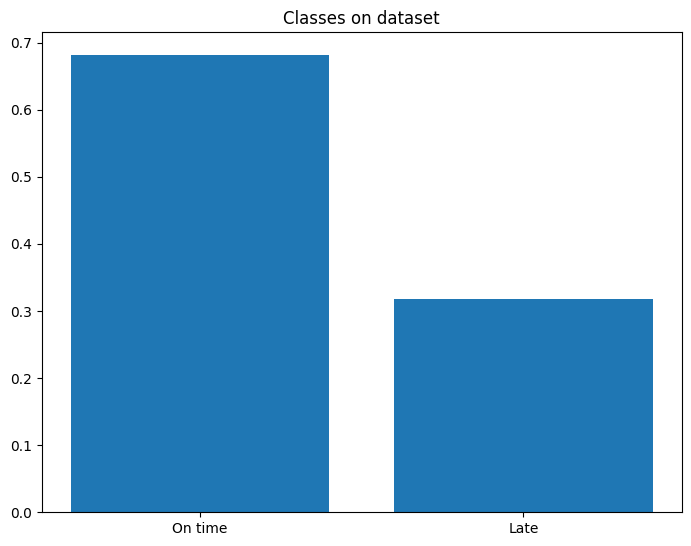

In [42]:
df_ontime_invoices = df[df.fecha_pago <= df.credito_fecha_fin]
df_late_invoices = df[df.fecha_pago > df.credito_fecha_fin]

OnTime = len(df_ontime_invoices.index) / len(df.index)
Late = len(df_late_invoices.index) / len(df.index)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['On time', 'Late'], [OnTime, Late])
plt.title('Classes on dataset')

print("On time:", OnTime*100,"%, Late:", Late*100, "%")
print('Total on time:', len(df_ontime_invoices.index))
print('Total lates:', len(df_late_invoices.index))


## 3.2 Unique customer in the data

In [43]:
print('Number of unique customers:', df['pagador_rfc'].nunique())

Number of unique customers: 566


## 3.3 Number of invoices per year per client

In [1]:
# a = df.groupby([df['credito_fecha_inicio'].dt.year])
# folios = a['folio_factura'].count()
# print(folios)
# pagadores = a['pagador_rfc'].nunique()
# print(pagadores)
# for i in range(len(folios)):
#   print(pagadores.iloc[i:2], folios.iloc[i]/pagadores.iloc[i])
  

resume = df['credito_fecha_inicio'].dt.year.unique()

NameError: ignored

## 4- Verify data quality
Es más común de lo que se gustaría que los datos no estén del todo perfectos, ya sea error de formato, valores faltantes, valores que se salen de lo estimado según el conjunto de datos (Valor atípico), error de medición, entre otros. Es necesario identificar todos estos puntos y analizar el porqué de su existencia así como empezar a cuestionar que se hará con ellos. El informe de la verificación de calidad de los datos nos servirá para decidir el impacto que tendrá sobre nuestro proyecto, ya sea positiva o negativamente.

### 4.1 Identificar valores nulos

In [9]:
df.isnull().sum()

folio_factura                      4
folio_credito                      0
factura_importe                    0
factura_moneda                     0
credito_fecha_inicio               0
credito_fecha_fin                  0
fecha_pago                         7
dias_financiar                     0
aplica_interes_en_dispersion       0
porcentaje_adelanto                0
linea_tipo                         0
contrato_marco                     0
linea_limite                       0
linea_moneda_principal             0
linea_monedas_permitidas           0
cliente_rfc                        0
cliente_razon_social               0
cliente_regimen_fiscal             0
cliente_pais                       0
cliente_fecha_nacimiento           0
cliente_ocupacion                  0
cliente_sector                     0
codigo_scian                       0
codigo_scian_nombre             2390
riesgo_pld                        99
pagador_rfc                        0
pagador_nombre                     0
p

In [10]:
df.columns

Index(['folio_factura', 'folio_credito', 'factura_importe', 'factura_moneda',
       'credito_fecha_inicio', 'credito_fecha_fin', 'fecha_pago',
       'dias_financiar', 'aplica_interes_en_dispersion', 'porcentaje_adelanto',
       'linea_tipo', 'contrato_marco', 'linea_limite',
       'linea_moneda_principal', 'linea_monedas_permitidas', 'cliente_rfc',
       'cliente_razon_social', 'cliente_regimen_fiscal', 'cliente_pais',
       'cliente_fecha_nacimiento', 'cliente_ocupacion', 'cliente_sector',
       'codigo_scian', 'codigo_scian_nombre', 'riesgo_pld', 'pagador_rfc',
       'pagador_nombre', 'pagador_pais', 'pagador_scian',
       'pagador_scian_nombre'],
      dtype='object')